In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import gzip
import lzma
from datetime import datetime, timedelta
import xarray as xr

In [2]:
os.chdir(r'C:\Users\Omen\OneDrive\Desktop\Coastal_Altimetry\Coastal_data')

In [3]:
tg = pd.read_csv(r'tidegauge\h775a.csv', header=None)

In [15]:
len(tg.index)

1015386

In [47]:
tg['time'] = [datetime(tg.iloc[x][0],tg.iloc[x][1],tg.iloc[x][2],tg.iloc[x][3],0,0,0) for x in range(len(tg.index))]
tg.drop(tg.index[tg[4]==-32767], inplace=True)
mssh = np.mean(tg[4])
print(mssh)
std = np.std(tg[4])
print(std)
tg.drop(tg.index[tg[4]>mssh+3*std], inplace=True)
tg.drop(tg.index[tg[4]<mssh-3*std], inplace=True)
mssh = np.mean(tg[(tg['time']>datetime(1965,1,1,1,0,0,0)) & (tg['time']<datetime(2015,1,1,1,0,0,0))][4])
print(mssh)

1350.6131421910327
308.28271767242586
1531.3038615141224


In [48]:
tg['sla'] = tg[4] - mssh

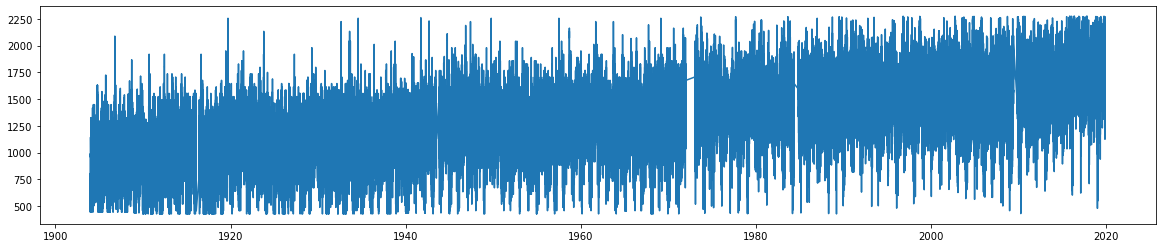

In [49]:
plt.figure(figsize=(20,4))
plt.plot(tg['time'],tg[4])

Text(0, 0.5, 'Sea-Level anomaly (mm)')

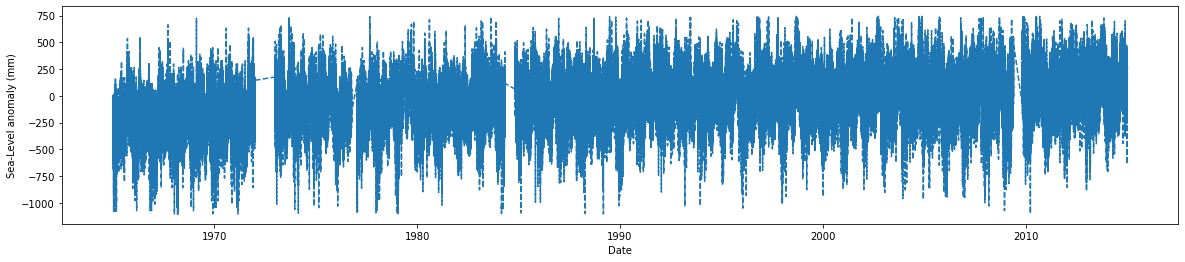

In [117]:
plt.figure(figsize=(20,4))
plt.plot(tg[(tg['time']>datetime(1965,1,1,1,0,0,0)) & (tg['time']<datetime(2015,1,1,1,0,0,0))]['time'],tg[(tg['time']>datetime(1965,1,1,1,0,0,0)) & (tg['time']<datetime(2015,1,1,1,0,0,0))]['sla'], '--')
plt.xlabel('Date')
plt.ylabel('Sea-Level anomaly (mm)')

In [51]:
len(tg.index)

978532

In [52]:
tg.head()

,0,1,2,3,4,time,sla
0,1904,1,1,6,961,1904-01-01 06:00:00,-570.303862
1,1904,1,1,7,992,1904-01-01 07:00:00,-539.303862
2,1904,1,1,8,961,1904-01-01 08:00:00,-570.303862
3,1904,1,1,9,900,1904-01-01 09:00:00,-631.303862
4,1904,1,1,10,809,1904-01-01 10:00:00,-722.303862


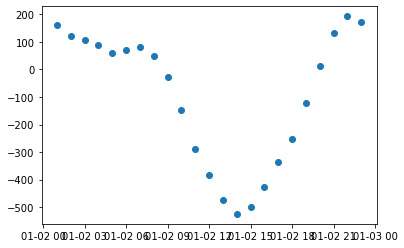

In [53]:
plt.plot(tg[(tg['time']>datetime(2011,1,2,0,0,0,0)) & (tg['time']<datetime(2011,1,3,0,0,0,0))]['time'],tg[(tg['time']>datetime(2011,1,2,0,0,0,0)) & (tg['time']<datetime(2011,1,3,0,0,0,0))]['sla'],'o')

In [96]:
def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6367 * c
    return km

In [97]:
ds = lzma.open('ctoh.sla.ref.TP+J1+J2+J3.gom.052.nc.lzma')
xtrack = xr.open_dataset(ds)
xtrack

<xarray.Dataset>
Dimensions:               (nbpoints: 178, nbcycles: 1004)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/13)
    lon                   (nbpoints) float32 ...
    lat                   (nbpoints) float32 ...
    mssh                  (nbpoints) float32 ...
    cycle                 (nbcycles) int32 ...
    point                 (nbpoints) int32 ...
    time                  (nbpoints, nbcycles) object ...
    ...                    ...
    tide                  (nbpoints, nbcycles) float32 ...
    dac                   (nbpoints, nbcycles) float32 ...
    dist_to_coast_gshhs   (nbpoints) float64 ...
    dist_to_coast_stumpf  (nbpoints) float64 ...
    mdt_cnes_cls_18       (nbpoints) float64 ...
    missions_cycles       (nbcycles) float32 ...
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/09
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  052
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [98]:
xtrack = xtrack.assign(distance=lambda x: distance(x.lon,x.lat,-94.793, 29.310))

In [99]:
xtrack

<xarray.Dataset>
Dimensions:               (nbpoints: 178, nbcycles: 1004)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/14)
    lon                   (nbpoints) float32 -88.78 -88.8 ... -94.69 -94.71
    lat                   (nbpoints) float32 15.9 15.94 15.99 ... 29.2 29.25
    mssh                  (nbpoints) float32 -0.1231 -0.1598 ... -26.66 -26.75
    cycle                 (nbcycles) int32 17 18 19 20 ... 1017 1018 1019 1020
    point                 (nbpoints) int32 4 5 6 86 87 ... 256 257 258 259 260
    time                  (nbpoints, nbcycles) object ...
    ...                    ...
    dac                   (nbpoints, nbcycles) float32 ...
    dist_to_coast_gshhs   (nbpoints) float64 4.413e+03 8.591e+03 ... 8.475e+03
    dist_to_coast_stumpf  (nbpoints) float64 4.269 8.238 6.244 ... 14.9 8.872
    mdt_cnes_cls_18       (nbpoints) float64 nan nan nan ... 0.2996 0.3009
    missions_cycles       (nbcycles) float32 17.0 18.0 19.0 ... 157.0 158.0
    distance              (nbpoints) float32 1.613e+03 1.607e+03 ... 16.35 10.55
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/09
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  052
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [100]:
xtrack_b = xtrack.where(xtrack.distance < 25, drop=True)
xtrack_b = xtrack_b.where(xtrack_b.cycle >673, drop=True)
xtrack_b = xtrack_b.where(xtrack_b.cycle <785, drop=True)
xtrack_b

<xarray.Dataset>
Dimensions:               (nbpoints: 3, nbcycles: 111)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/14)
    lon                   (nbpoints, nbcycles) float32 -94.66 -94.66 ... -94.71
    lat                   (nbpoints, nbcycles) float32 29.15 29.15 ... 29.25
    mssh                  (nbpoints, nbcycles) float32 -26.54 -26.54 ... -26.75
    cycle                 (nbcycles, nbpoints) float64 674.0 674.0 ... 784.0
    point                 (nbpoints, nbcycles) float64 258.0 258.0 ... 260.0
    time                  (nbpoints, nbcycles) object 2011-01-02 09:11:00.018...
    ...                    ...
    dac                   (nbpoints, nbcycles) float32 -0.2236 ... -0.1559
    dist_to_coast_gshhs   (nbpoints, nbcycles) float64 2.019e+04 ... 8.475e+03
    dist_to_coast_stumpf  (nbpoints, nbcycles) float64 20.96 20.96 ... 8.872
    mdt_cnes_cls_18       (nbpoints, nbcycles) float64 0.2941 0.2941 ... 0.3009
    missions_cycles       (nbcycles, nbpoints) float32 92.0 92.0 ... 202.0 202.0
    distance              (nbpoints, nbcycles) float32 22.37 22.37 ... 10.55
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/09
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  052
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [101]:
np.unique(xtrack_b['distance'])

array([10.553858, 16.346666, 22.366758], dtype=float32)

In [102]:
xtrack_np = xtrack_b.where(xtrack_b.distance<12,drop=True)

In [103]:
xtrack_np

<xarray.Dataset>
Dimensions:               (nbpoints: 1, nbcycles: 111)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/14)
    lon                   (nbpoints, nbcycles) float32 -94.71 -94.71 ... -94.71
    lat                   (nbpoints, nbcycles) float32 29.25 29.25 ... 29.25
    mssh                  (nbpoints, nbcycles) float32 -26.75 -26.75 ... -26.75
    cycle                 (nbcycles, nbpoints) float64 674.0 675.0 ... 784.0
    point                 (nbpoints, nbcycles) float64 260.0 260.0 ... 260.0
    time                  (nbpoints, nbcycles) object 2011-01-02 09:10:57.977...
    ...                    ...
    dac                   (nbpoints, nbcycles) float32 -0.2354 nan ... -0.1559
    dist_to_coast_gshhs   (nbpoints, nbcycles) float64 8.475e+03 ... 8.475e+03
    dist_to_coast_stumpf  (nbpoints, nbcycles) float64 8.872 8.872 ... 8.872
    mdt_cnes_cls_18       (nbpoints, nbcycles) float64 0.3009 0.3009 ... 0.3009
    missions_cycles       (nbcycles, nbpoints) float32 92.0 93.0 ... 201.0 202.0
    distance              (nbpoints, nbcycles) float32 10.55 10.55 ... 10.55
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/09
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  052
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [104]:
def sla_tg_extractor(time):
    yy = time.dt.year[0]
    sla = np.zeros(len(yy))
    mm = time.dt.month[0]
    dd = time.dt.day[0]
    hh = time.dt.hour[0]
    m = time.dt.minute[0]
    for i in range(len(hh)):
        if mm[i] > 30:
            hh[i] += 1
        time1 = datetime(yy[i],mm[i],dd[i],hh[i],0,0,0)
        sla[i] = tg[tg['time'] == time1]['sla']
    return sla

In [105]:
xtrack_np = xtrack_np.assign(sla_tg=lambda x: sla_tg_extractor(x.time)/1000 - x.tide - x.dac)

C:\Users\Omen\AppData\Local\Temp/ipykernel_4084/1564895840.py:11: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  time1 = datetime(yy[i],mm[i],dd[i],hh[i],0,0,0)


In [106]:
sla_tg_extractor(xtrack_np.time)/1000 + xtrack_np.tide + xtrack_np.dac

C:\Users\Omen\AppData\Local\Temp/ipykernel_4084/1564895840.py:11: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  time1 = datetime(yy[i],mm[i],dd[i],hh[i],0,0,0)


<xarray.DataArray (nbpoints: 1, nbcycles: 111)>
array([[-0.32750385,         nan, -0.19310386,  0.33419613, -0.12110385,
                nan,  0.17709614,  0.19959614,  0.12759614, -0.16150386,
         0.05399614,  0.16139614,  0.70459614,  0.18449613,         nan,
        -0.34980385,  0.02399614,  0.16359614,  0.15859614,  0.02969614,
         0.15779614,  0.64279613,  0.32609613,  0.12639614,  0.22079616,
         0.43829614,  0.19209614, -0.30730385, -0.02540386,  0.18429614,
         0.52829613,  0.24559614, -0.38280386, -0.78190385, -0.04040386,
         0.27879614,  0.58209614,  0.02219614, -0.26200387,  0.13569614,
         0.29099613,  0.12069614, -0.05910386,  0.12099612,  0.47849615,
         0.20359614, -0.17590387, -0.54050387, -0.06480387,  0.40769614,
         0.43409614, -0.64310386,         nan,  0.03499614,  0.80529614,
         0.68959614,  0.19149614,  0.16979614,  0.44469613,  0.31759614,
                nan, -0.06480386,  0.26669614,  0.46589613,  0.11569614,
        -0.40770386, -0.16140386, -0.30020386, -0.16870386, -0.37040387,
                nan,  0.00469613,  0.39859615,         nan,  0.26719614,
                nan,  0.17939613, -0.15540386,         nan, -0.14440386,
        -0.10360385,  0.24999613,         nan,         nan, -0.09980388,
         0.09669613, -0.47140385, -0.05680387, -0.33470388, -0.02400386,
         0.26389614,  0.23859614,  0.31879614,  0.27659614,  0.81819614,
         0.31029614, -0.05330386, -0.51350385, -0.14100387,         nan,
         0.98279614,  0.01649615, -0.60820387,         nan,  0.20139614,
         0.36009613,  0.26099615,         nan,  0.08709613,         nan,
         0.11959614]])
Dimensions without coordinates: nbpoints, nbcycles

Text(0, 0.5, 'sea-level anomaly (m)')

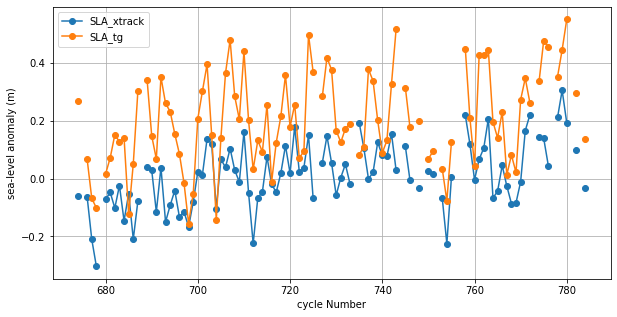

In [107]:
plt.figure(figsize=(10,5))
plt.plot(xtrack_np['cycle'],xtrack_np['sla'].T,marker='o',label='SLA_xtrack')
plt.plot(xtrack_np['cycle'],xtrack_np['sla_tg'].T,marker='o',label='SLA_tg')
plt.grid()
plt.legend()
plt.xlabel('cycle Number')
plt.ylabel('sea-level anomaly (m)')

In [108]:
x = xtrack_np['sla'][0]
y = xtrack_np['sla_tg'][0]
sla_xtrack = x[np.logical_not(np.isnan(x))]
sla_tg = y[np.logical_not(np.isnan(y))]
np.corrcoef(sla_xtrack,sla_tg)

array([[1.        , 0.67893349],
       [0.67893349, 1.        ]])

In [109]:
rmse = np.sqrt(((sla_xtrack-sla_tg)**2).mean())
rmse

<xarray.DataArray ()>
array(0.22346097)

In [110]:
xtrack_b = xtrack_b.assign(sla_tg=lambda x: (sla_tg_extractor(x.time)/1000)-x.tide-x.dac)

C:\Users\Omen\AppData\Local\Temp/ipykernel_4084/1564895840.py:11: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  time1 = datetime(yy[i],mm[i],dd[i],hh[i],0,0,0)


In [111]:
xtrack_b

<xarray.Dataset>
Dimensions:               (nbpoints: 3, nbcycles: 111)
Dimensions without coordinates: nbpoints, nbcycles
Data variables: (12/15)
    lon                   (nbpoints, nbcycles) float32 -94.66 -94.66 ... -94.71
    lat                   (nbpoints, nbcycles) float32 29.15 29.15 ... 29.25
    mssh                  (nbpoints, nbcycles) float32 -26.54 -26.54 ... -26.75
    cycle                 (nbcycles, nbpoints) float64 674.0 674.0 ... 784.0
    point                 (nbpoints, nbcycles) float64 258.0 258.0 ... 260.0
    time                  (nbpoints, nbcycles) object 2011-01-02 09:11:00.018...
    ...                    ...
    dist_to_coast_gshhs   (nbpoints, nbcycles) float64 2.019e+04 ... 8.475e+03
    dist_to_coast_stumpf  (nbpoints, nbcycles) float64 20.96 20.96 ... 8.872
    mdt_cnes_cls_18       (nbpoints, nbcycles) float64 0.2941 0.2941 ... 0.3009
    missions_cycles       (nbcycles, nbpoints) float32 92.0 92.0 ... 202.0 202.0
    distance              (nbpoints, nbcycles) float32 22.37 22.37 ... 10.55
    sla_tg                (nbpoints, nbcycles) float64 0.2854 0.1349 ... 0.1358
Attributes:
    title:        CTOH Along track Sea Level Anomalies
    institution:  CTOH/LEGOS, Toulouse Univ., CNRS, IRD, CNES, UPS, France
    Conventions:  CF-1.6
    history:      creation: 2020/09/09
    contact:      ctoh_products@legos.obs-mip.fr  http://ctoh.legos.obs-mip.fr
    version:      Version X-TRACK: 1.03.post18 - Version mercurial: hgcad1f04...
    doi:          10.6096/CTOH_X-TRACK_2017_02
    reference:    Birol, F. et al. “Coastal Applications from Nadir Altimetry...
    pass_number:  052
    handbook:     https://www.aviso.altimetry.fr/fileadmin/documents/data/too...

In [112]:
x = xtrack_b['sla']
y = xtrack_b['sla_tg']
x = np.nanmean(x, axis=0)
y = np.nanmean(y, axis=0)
sla_xtrack = x[np.logical_not(np.isnan(x))]
sla_tg = y[np.logical_not(np.isnan(y))]
np.corrcoef(sla_xtrack,sla_tg)

C:\Users\Omen\AppData\Local\Temp/ipykernel_4084/3195988046.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(x, axis=0)
C:\Users\Omen\AppData\Local\Temp/ipykernel_4084/3195988046.py:4: RuntimeWarning: Mean of empty slice
  y = np.nanmean(y, axis=0)


array([[1.        , 0.69156007],
       [0.69156007, 1.        ]])

Text(0, 0.5, 'sea-level anomaly (m)')

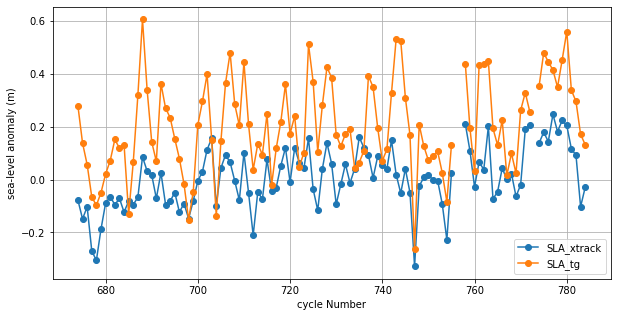

In [113]:
plt.figure(figsize=(10,5))
plt.plot(xtrack_np['cycle'],x,marker='o',label='SLA_xtrack')
plt.plot(xtrack_np['cycle'],y,marker='o',label='SLA_tg')
plt.grid()
plt.legend()
plt.xlabel('cycle Number')
plt.ylabel('sea-level anomaly (m)')

In [114]:
rmse = np.sqrt(((sla_xtrack-sla_tg)**2).mean())
rmse

0.23239576055301314